# Preprocessing of question-answering pairs

## Description
Try to detect categories at python tag

## Tasks

1. Update regs to python tag

2. Apply LDA to thematic modeling

3. Gets datasets

In [1]:
import pandas as pd
from os.path import join as opj
import numpy as np
import json
import sys
sys.path.append(r'D:\CQA_RLHF')

In [2]:
from postclassifier.api_change import API_change
from postclassifier.api_usage import API_usage
from postclassifier.conceptual import Conceptual
from postclassifier.discrepancy import Discrepancy
from postclassifier.documentation import Documentation
from postclassifier.errors import Errors
from postclassifier.review import Review

In [3]:
pd.set_option("display.max_colwidth", None)

In [5]:
data_path = r'D:\CQA_RLHF\data\processed'

In [5]:
q_a_df = pd.read_csv(r'D:\CQA_RLHF\data\processed\tanh_score\1.0-all-data-tanh_score.csv')

In [6]:
classifiers = [
    API_change(),
    API_usage(),
    Conceptual(),
    Discrepancy(),
    Documentation(),
    Errors(),
    Review(),
]

In [7]:
q_a_df.head(1)

,Q_CreationDate,Title,Question,Answer,Score,Is_accepted,N_answers,Q_Id
0,2008-08-02 03:35:55.697,XML Processing in Python,"I am about to build a piece of a project that will need to construct and post an XML document to a web service and I'd like to do it in Python, as a means to expand my skills in it. \nUnfortunately, whilst I know the XML model fairly well in .NET, I'm uncertain what the pros and cons are of the XML models in Python. \nAnyone have experience doing XML processing in Python? Where would you suggest I start? The XML files I'll be building will be fairly simple.","I write a SOAP server that receives XML requests and creates XML responses. (Unfortunately, it's not my project, so it's closed source, but that's another problem).\nIt turned out for me that creating (SOAP) XML documents is fairly simple if you have a data structure that ""fits"" the schema.\nI keep the envelope since the response envelope is (almost) the same as the request envelope. Then, since my data structure is a (possibly nested) dictionary, I create a string that turns this dictionary into <key>value</key> items. \nThis is a task that recursion makes simple, and I end up with the right structure. This is all done in python code and is currently fast enough for production use.\nYou can also (relatively) easily build lists as well, although depending upon your client, you may hit problems unless you give length hints.\nFor me, this was much simpler, since a dictionary is a much easier way of working than some custom class. For the books, generating XML is much easier than parsing!",0.201295,False,6,0


In [8]:
for cc in classifiers:
    q_a_df[f"{cc.name}"] = q_a_df.apply(
        lambda x: cc.classify(x.Title, x.Question), axis=1
    )

In [10]:
q_a_df.describe()

,Score,N_answers,API_CHANGE,API_USAGE,CONCEPTUAL,DISCREPANCY,DOCUMENTATION,ERRORS,REVIEW
count,65853.000000,65853.000000,65853.000000,65853.000000,65853.000000,65853.000000,65853.000000,65853.000000,65853.000000
mean,0.972849,1.802667,0.020409,0.151064,0.193765,0.154298,0.023036,0.121058,0.046072
std,1.066571,1.800060,0.141396,0.358114,0.395250,0.361237,0.150019,0.326197,0.209643
min,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
api_usage_df = q_a_df[q_a_df['API_USAGE'] == 1]

In [10]:
api_usage_df.describe()

,Score,N_answers,Q_Id,API_CHANGE,API_USAGE,CONCEPTUAL,DISCREPANCY,DOCUMENTATION,ERRORS,REVIEW
count,9948.000000,9948.000000,9948.000000,9948.000000,9948.0,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000
mean,0.417918,1.585243,24122.808102,0.022014,1.0,0.173402,0.168074,0.033474,0.090370,0.045738
std,0.512592,1.377435,14920.351711,0.146738,0.0,0.378613,0.373951,0.179880,0.286725,0.208926
min,-0.999909,1.000000,4.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11185.250000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.173164,1.000000,23125.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.200000,2.000000,36915.250000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.200000,17.000000,51491.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
save_path = r'D:\CQA_RLHF\data\processed'

In [14]:
api_usage_df = api_usage_df.reset_index(drop=True)

In [17]:
api_usage_df.to_csv(r'D:\CQA_RLHF\data\processed\tanh_score\1.0-all_data-api_usage-tanh_score.csv')

In [14]:
df_with_one_ans = api_usage_df[api_usage_df['N_answers'] == 1]

test_dict = df_with_one_ans.to_dict(orient='records')

# Combine the dictionaries into a list of dictionaries
data_to_save = {'test': test_dict}

# Save the list of dictionaries to a JSON file
with open(opj(save_path, r'log_score\1.0-data-log_score-api-usage-to-gen.json'), 'w') as f:
    json.dump(data_to_save, f)

In [15]:
train_df = api_usage_df[:-3000]
val_df = api_usage_df[-3000:-2000]
test_df = api_usage_df[-2000:]
# Convert each set to a dictionary
train_dict = train_df.to_dict(orient='records')
val_dict = val_df.to_dict(orient='records')
test_dict = test_df.to_dict(orient='records')

# Combine the dictionaries into a list of dictionaries
data_to_save = {'train': train_dict, 'val': val_dict, 'test': test_dict}

# Save the list of dictionaries to a JSON file``
with open(opj(save_path, r'log_score\1.0-data-log_score-api-usage.json'), 'w') as f:
    json.dump(data_to_save, f)

<AxesSubplot:xlabel='Score', ylabel='Count'>

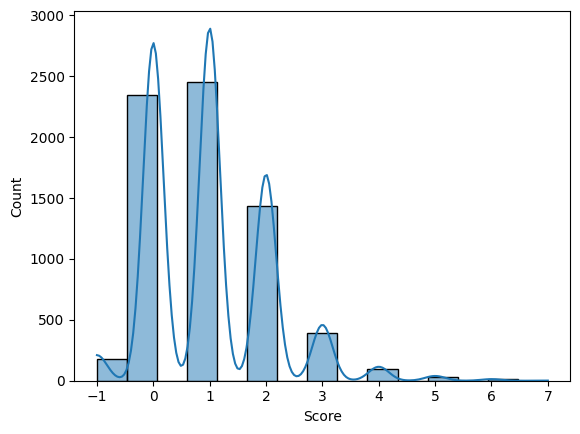

In [23]:
import seaborn as sns
sns.histplot(train_df.Score, kde=True, bins=15)